# Solving Second-Order ODE Using Explicit RK4 Method
This notebook solves the second-order differential equation:
$$
y'' + x y' + y = 0,\quad y(0) = 1,\ y'(0) = 0
$$
by converting it into a system of first-order ODEs and applying the **RK4 method** with explicit calculation of intermediate terms $k_1, k_2, k_3, k_4$ and $l_1, l_2, l_3, l_4$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define the Derivative Function

In [2]:
def f(x, y, z):
    return -x * z - y  # RHS of z' = f(x, y, z)

## RK4 Step Function with Explicit Intermediate Terms

In [3]:
def rk4_step(x, y, z, h):
    # k1, l1
    l1 = h * f(x, y, z)
    k1 = h * z

    # k2, l2
    l2 = h * f(x + h/2, y + k1/2, z + l1/2)
    k2 = h * (z + l1/2)

    # k3, l3
    l3 = h * f(x + h/2, y + k2/2, z + l2/2)
    k3 = h * (z + l2/2)

    # k4, l4
    l4 = h * f(x + h, y + k3, z + l3)
    k4 = h * (z + l3)

    # Update y and z
    y_new = y + (k1 + 2*k2 + 2*k3 + k4)/6
    z_new = z + (l1 + 2*l2 + 2*l3 + l4)/6
    x_new = x + h

    return x_new, y_new, z_new

## Integration Loop

In [4]:
def integrate_rk4(f, x0, y0, z0, x_end, h):
    X = [x0]
    Y = [y0]
    Z = [z0]
    
    while X[-1] < x_end:
        x_new, y_new, z_new = rk4_step(X[-1], Y[-1], Z[-1], h)
        X.append(x_new)
        Y.append(y_new)
        Z.append(z_new)
    
    return np.array(X), np.array(Y), np.array(Z)

## Set Parameters and Solve

In [5]:
x0 = 0.0
y0 = 1.0
z0 = 0.0
x_end = 10.0
h = 0.1

X, Y, Z = integrate_rk4(f, x0, y0, z0, x_end, h)

## Plotting the Results

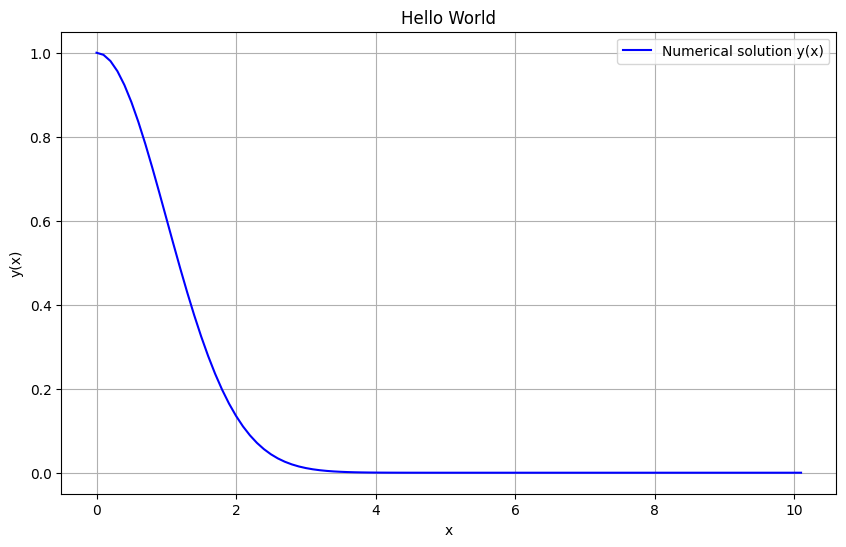

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(X, Y, label='Numerical solution y(x)', color='blue')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.title('Solution of y\'\' + x y\' + y = 0 using RK4'),
plt.title("Hello World")
plt.legend()
plt.show()